In [1]:
# ******** Data Exploration ***********
# https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data

# Shown from a yearly, monthly, and daily perspective
# Descriptive Statistics
# Bar Chart
# Box Plot/Histogram
# Seasonalities


In [822]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
from pandas import concat
from pytrends.request import TrendReq
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series


# !pip install pyramid-arima   
# !pip install pytrends
# !pip install skti
data_monthly = pd.read_csv('salesmonthly.csv')
data_monthly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [823]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [824]:
data_weekly = pd.read_csv('salesweekly.csv')
data_weekly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [825]:
data_hourly=pd.read_csv('saleshourly.csv')
data_weekly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [826]:
cols = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']


for x in cols:
        print("*************** " + x + " DATA_DAILY STATS *****************" )
        print(data_daily[x].describe())
        
for x in cols:
        print("*************** " + x + " DATA_WEEKLY STATS *****************" )
        print(data_weekly[x].describe())
        
for x in cols:
        print("*************** " + x + " DATA_MONTHLY STATS *****************" )
        print(data_monthly[x].describe())
        
        
        

*************** M01AB DATA_DAILY STATS *****************
count    2106.000000
mean        5.033683
std         2.737579
min         0.000000
25%         3.000000
50%         4.990000
75%         6.670000
max        17.340000
Name: M01AB, dtype: float64
*************** M01AE DATA_DAILY STATS *****************
count    2106.000000
mean        3.895830
std         2.133337
min         0.000000
25%         2.340000
50%         3.670000
75%         5.138000
max        14.463000
Name: M01AE, dtype: float64
*************** N02BA DATA_DAILY STATS *****************
count    2106.000000
mean        3.880441
std         2.384010
min         0.000000
25%         2.000000
50%         3.500000
75%         5.200000
max        16.000000
Name: N02BA, dtype: float64
*************** N02BE DATA_DAILY STATS *****************
count    2106.000000
mean       29.917095
std        15.590966
min         0.000000
25%        19.000000
50%        26.900000
75%        38.300000
max       161.000000
Name: N02BE, dty

In [827]:
def scatter_plot(vals, color):
    dictionary  = dict(zip(cols, vals))
    data = list(dictionary.items())
    arr = np.array(data)
    vals = floatArray = np.asarray( arr[:,1], dtype = float)
    plt.scatter(arr[:,0], vals, c=color)
    
    
def bar_chart(vals, color):
    dictionary  = dict(zip(cols, vals))
    data = list(dictionary.items())
    arr = np.array(data)
    vals = floatArray = np.asarray( arr[:,1], dtype = float)
    plt.bar(arr[:,0], vals, color = color)
    

In [2]:

daily_mean_arr = np.array([])
for x in cols:
        mean_daily = np.average(data_daily[x])
        daily_mean_arr = np.concatenate((daily_mean_arr,[mean_daily]))
        
        
weekly_mean_arr = np.array([])
for x in cols:
        mean_weekly = np.average(data_weekly[x])
        weekly_mean_arr = np.concatenate((weekly_mean_arr,[mean_weekly]))
        
monthly_mean_arr = np.array([])
for x in cols:
        mean_monthly = np.average(data_monthly[x])
        monthly_mean_arr = np.concatenate((monthly_mean_arr,[mean_monthly]))


bar_chart(daily_mean_arr, 'red')
plt.title('Pharma Sales Daily Averages by Drug Groups')
plt.show()
    

bar_chart(weekly_mean_arr, 'blue')
plt.title('Pharma Sales Weekly Averages by Drug Groups')
plt.show()
    
bar_chart(monthly_mean_arr, 'green')
plt.title('Pharma Sales Monthly Averages by Drug Groups')
plt.show()
    



NameError: name 'np' is not defined

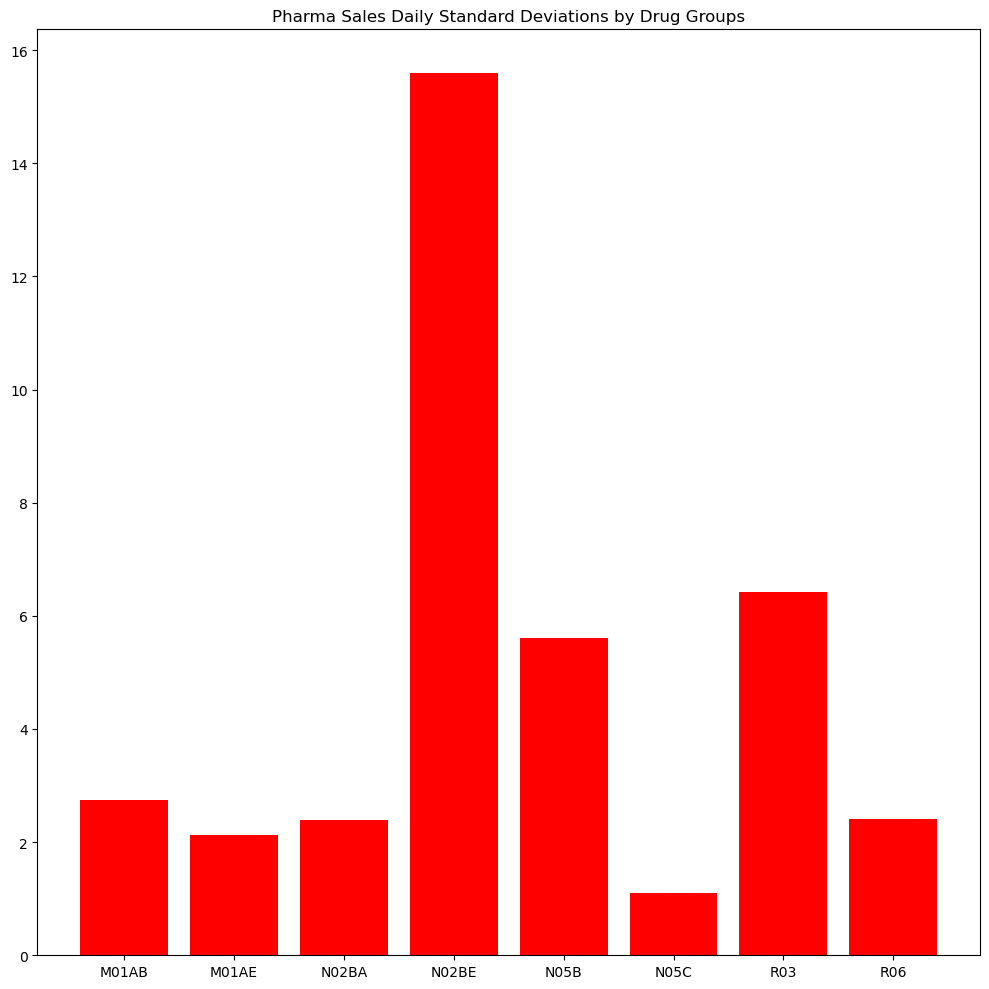

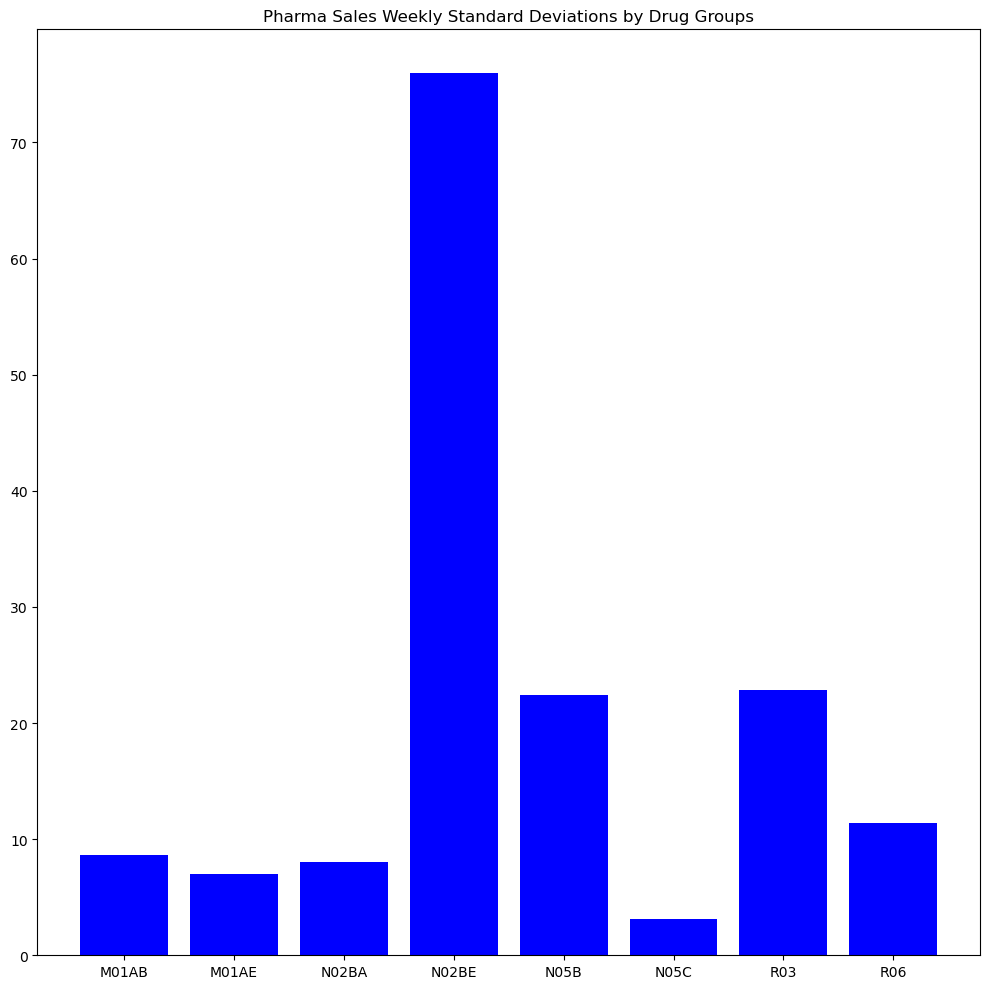

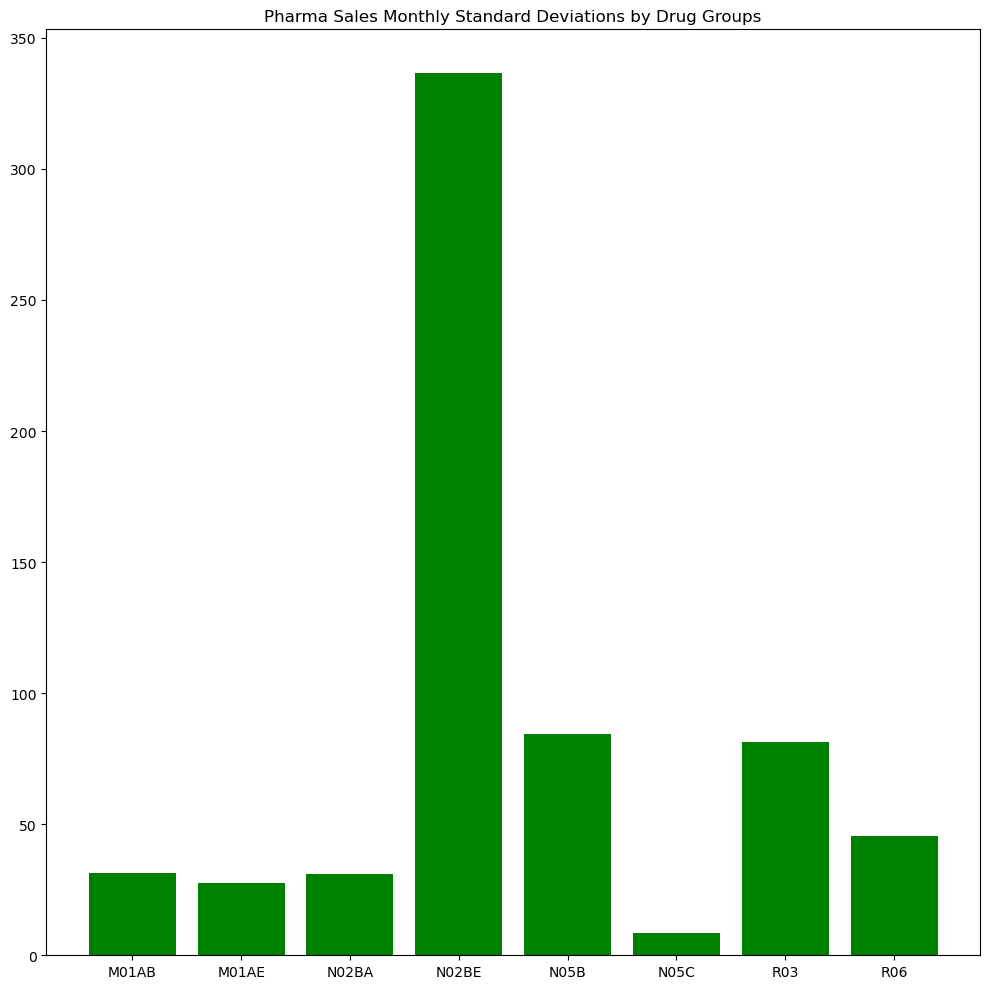

In [829]:

daily_std_arr = np.array([])
for x in cols:
        std_daily = np.std(data_daily[x])
        daily_std_arr = np.concatenate((daily_std_arr,[std_daily]))
        
        
weekly_std_arr = np.array([])
for x in cols:
        std_weekly = np.std(data_weekly[x])
        weekly_std_arr = np.concatenate((weekly_std_arr,[std_weekly]))
        
monthly_std_arr = np.array([])
for x in cols:
        std_monthly = np.std(data_monthly[x])
        monthly_std_arr = np.concatenate((monthly_std_arr,[std_monthly]))

bar_chart(daily_std_arr, 'red')
plt.title('Pharma Sales Daily Standard Deviations by Drug Groups')
plt.show()
    

bar_chart(weekly_std_arr, 'blue')
plt.title('Pharma Sales Weekly Standard Deviations by Drug Groups')
plt.show()
    
bar_chart(monthly_std_arr, 'green')
plt.title('Pharma Sales Monthly Standard Deviations by Drug Groups')
plt.show()

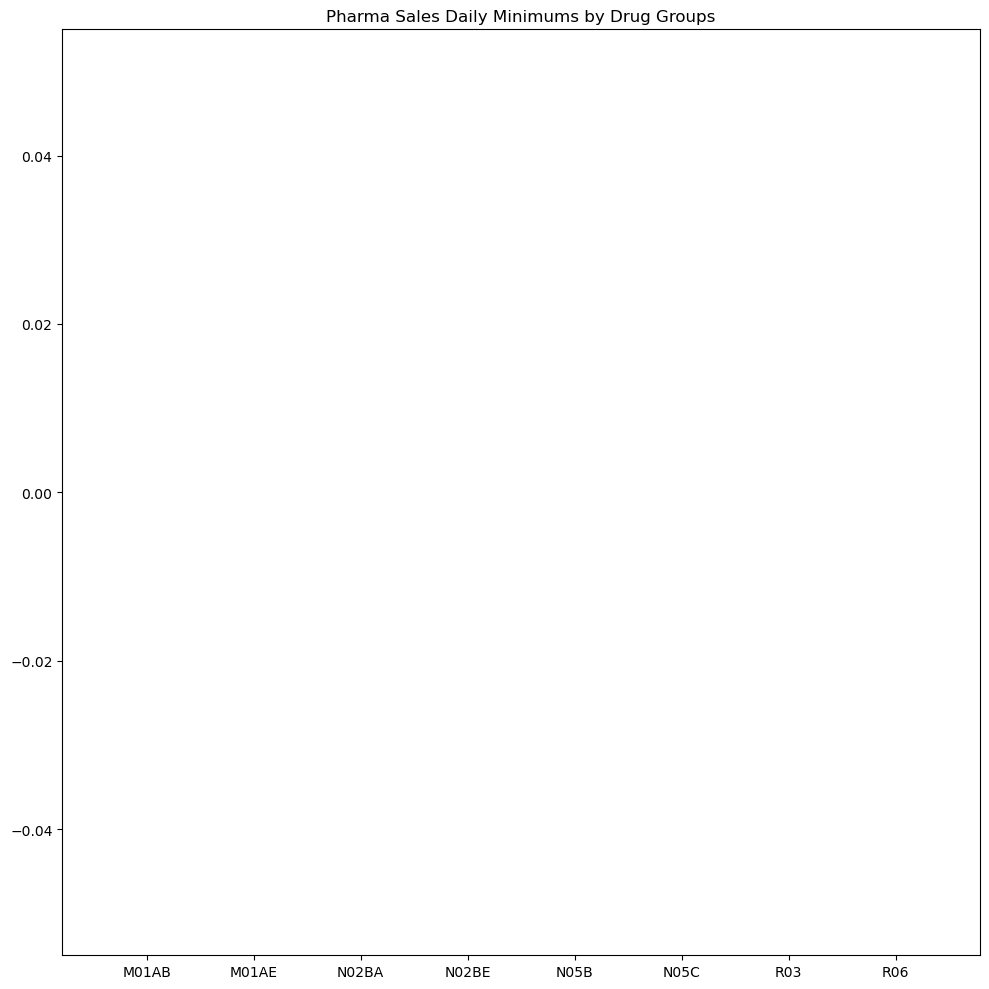

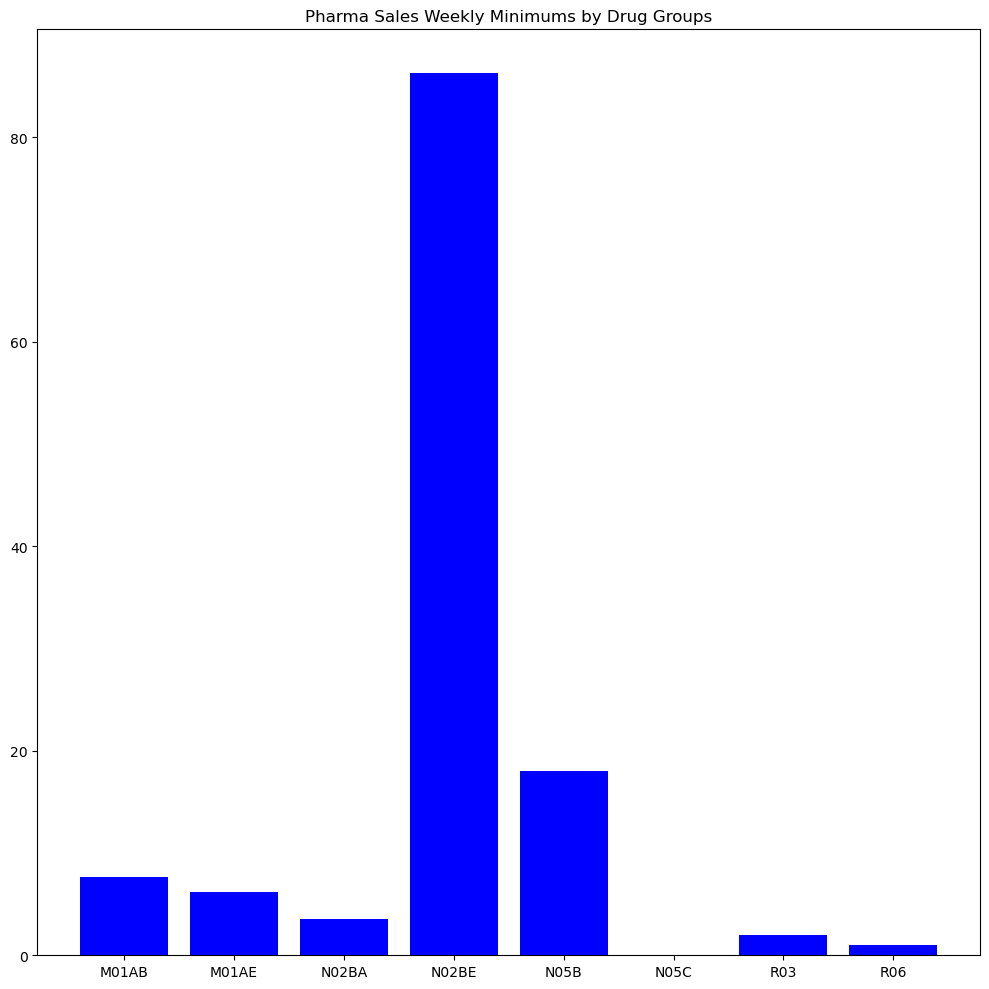

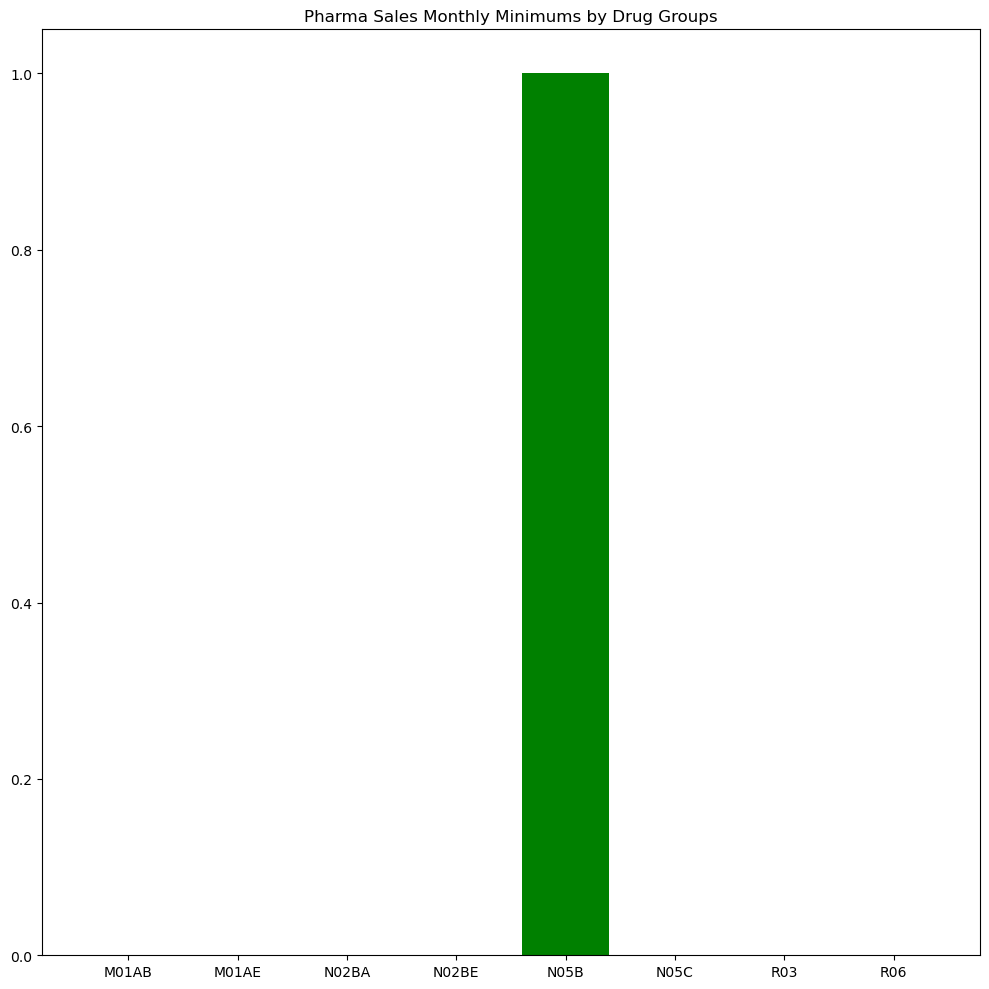

In [830]:
daily_min_arr = np.array([])
for x in cols:
        min_daily = np.min(data_daily[x])
        daily_min_arr = np.concatenate((daily_min_arr,[min_daily]))
        
        
weekly_min_arr = np.array([])
for x in cols:
        min_weekly = np.min(data_weekly[x])
        weekly_min_arr = np.concatenate((weekly_min_arr,[min_weekly]))
        
monthly_min_arr = np.array([])
for x in cols:
        min_monthly = np.min(data_monthly[x])
        monthly_min_arr = np.concatenate((monthly_min_arr,[min_monthly]))


bar_chart(daily_min_arr, 'red')
plt.title('Pharma Sales Daily Minimums by Drug Groups')
plt.show()
    

bar_chart(weekly_min_arr, 'blue')
plt.title('Pharma Sales Weekly Minimums by Drug Groups')
plt.show()
    
bar_chart(monthly_min_arr, 'green')
plt.title('Pharma Sales Monthly Minimums by Drug Groups')
plt.show()

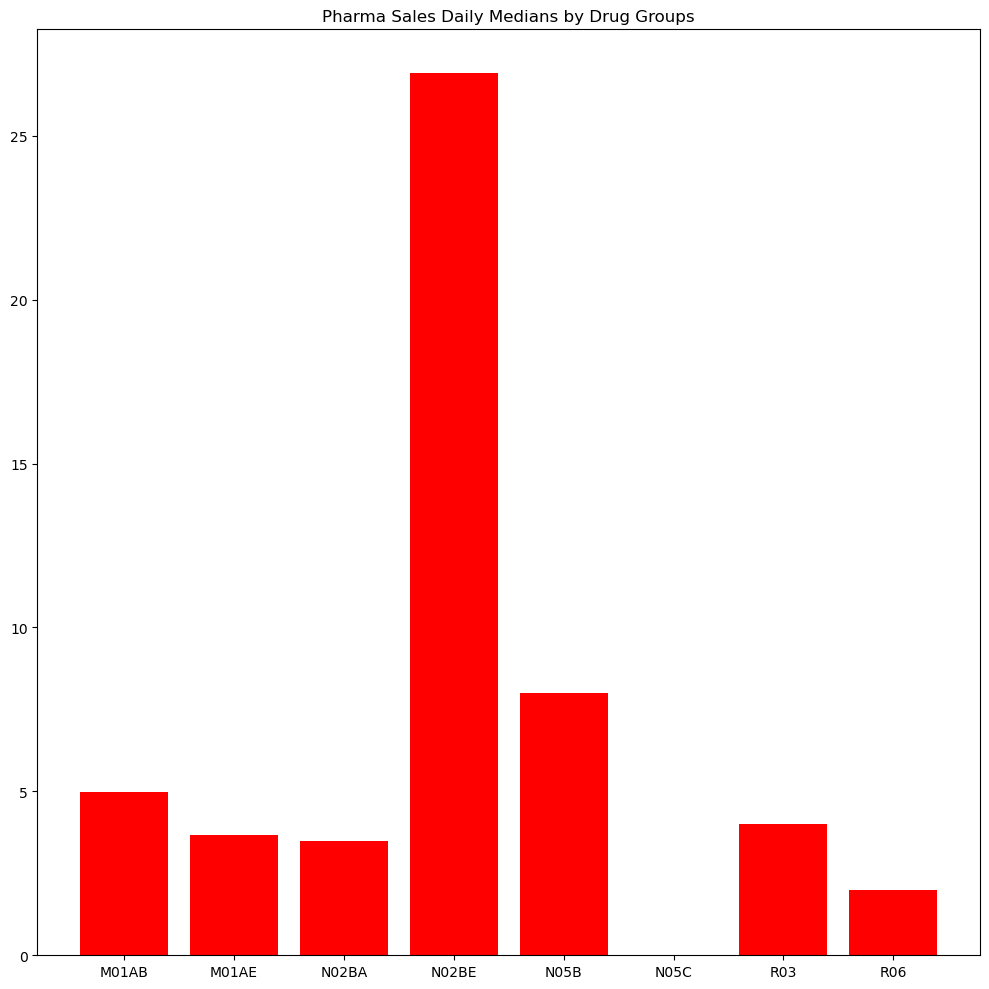

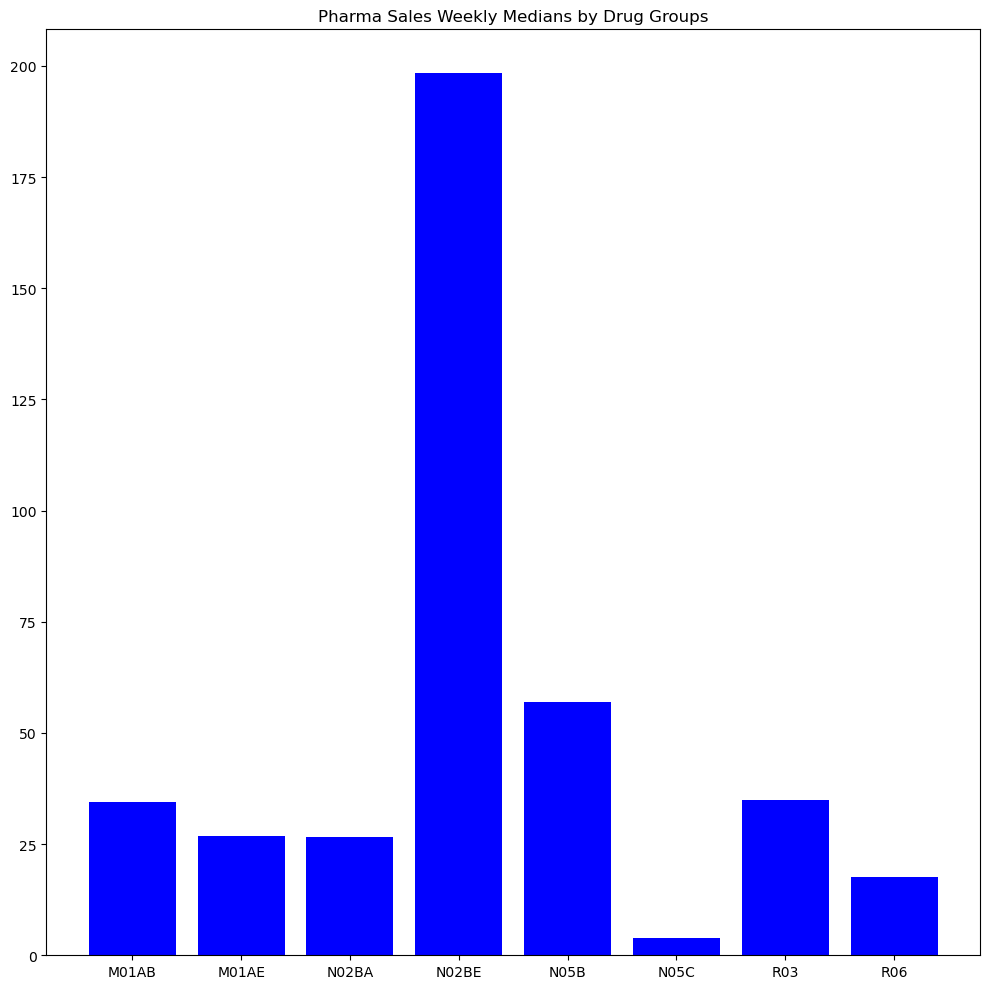

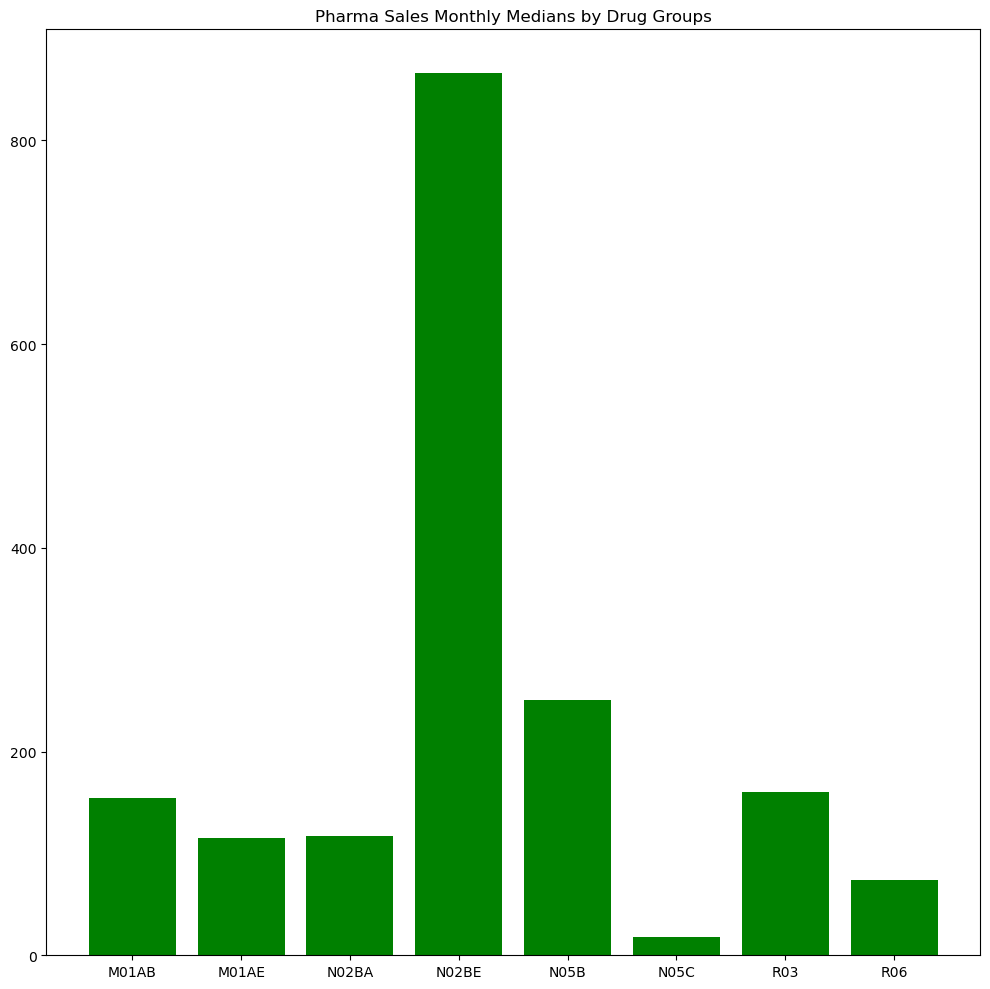

In [831]:
daily_med_arr = np.array([])
for x in cols:
        med_daily = np.median(data_daily[x])
        daily_med_arr = np.concatenate((daily_med_arr,[med_daily]))
        
        
weekly_med_arr = np.array([])
for x in cols:
        med_weekly = np.median(data_weekly[x])
        weekly_med_arr = np.concatenate((weekly_med_arr,[med_weekly]))
        
monthly_med_arr = np.array([])
for x in cols:
        med_monthly = np.median(data_monthly[x])
        monthly_med_arr = np.concatenate((monthly_med_arr,[med_monthly]))


bar_chart(daily_med_arr, 'red')
plt.title('Pharma Sales Daily Medians by Drug Groups')
plt.show()
    

bar_chart(weekly_med_arr, 'blue')
plt.title('Pharma Sales Weekly Medians by Drug Groups')
plt.show()
    
bar_chart(monthly_med_arr, 'green')
plt.title('Pharma Sales Monthly Medians by Drug Groups')
plt.show()

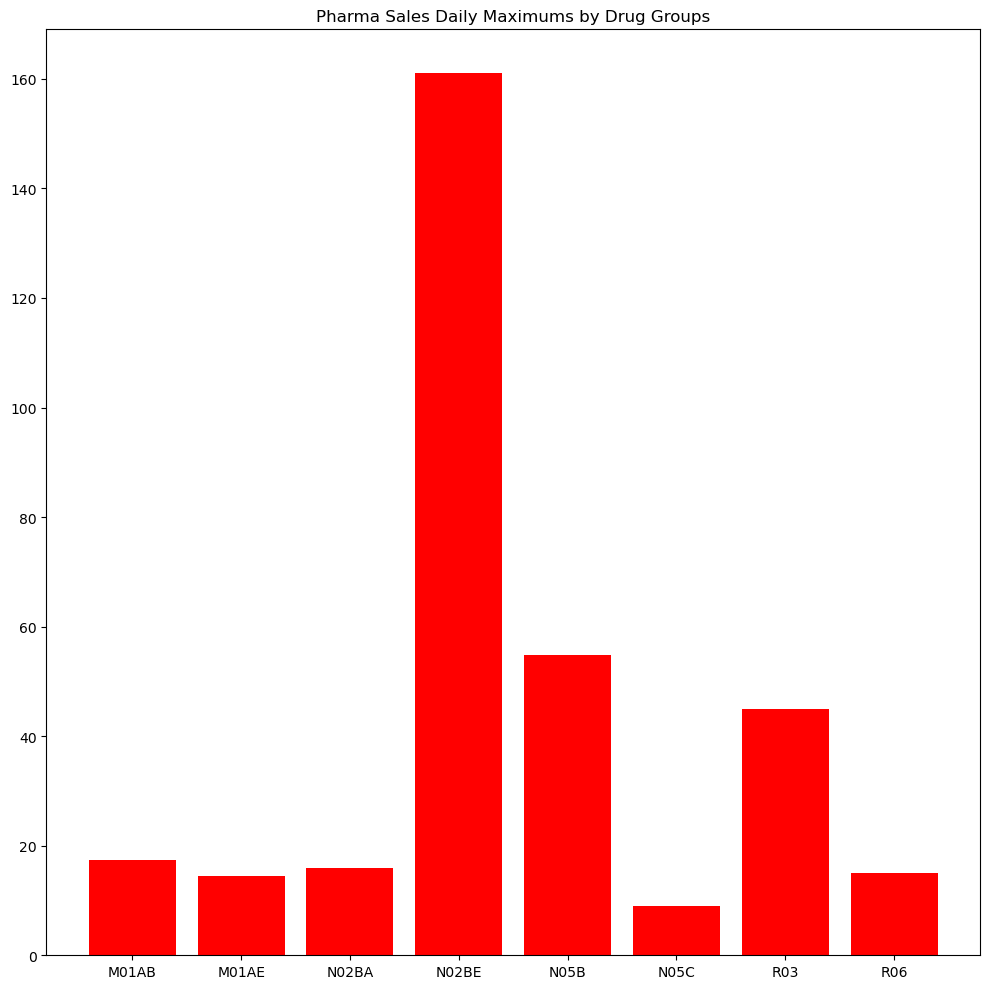

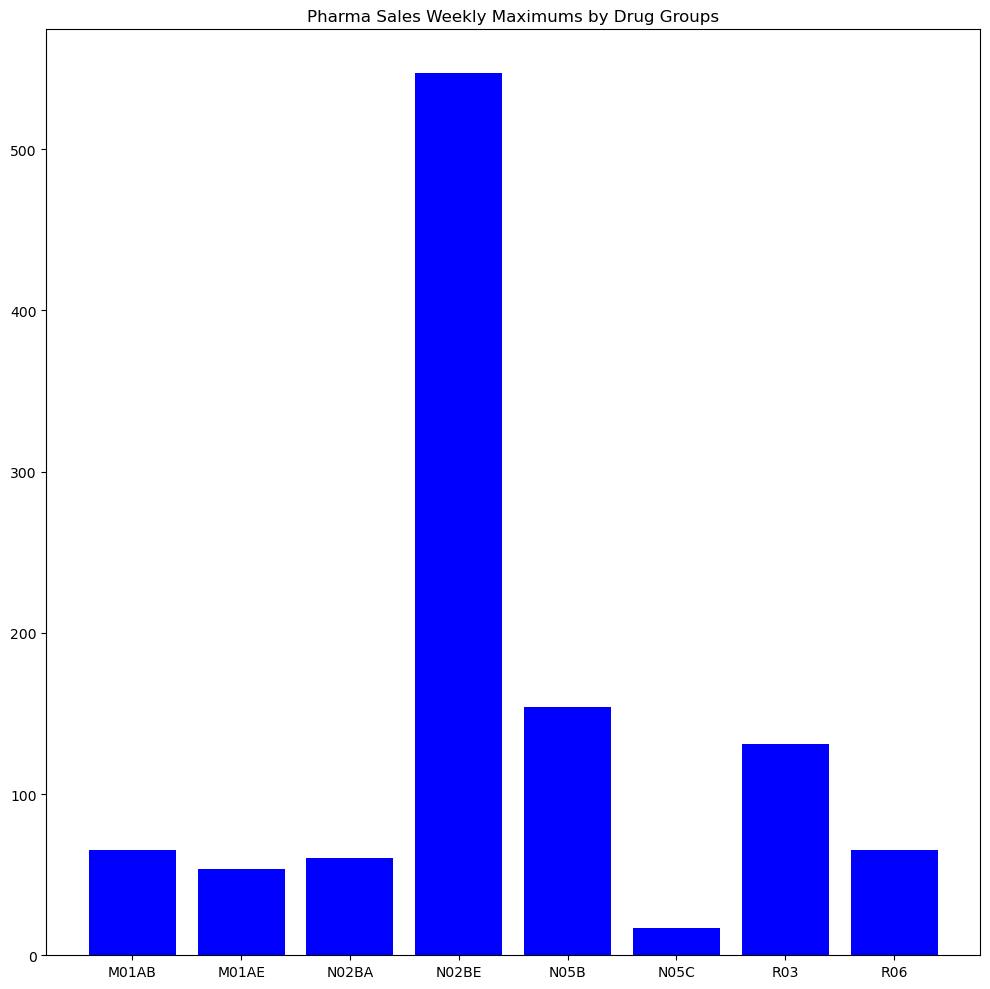

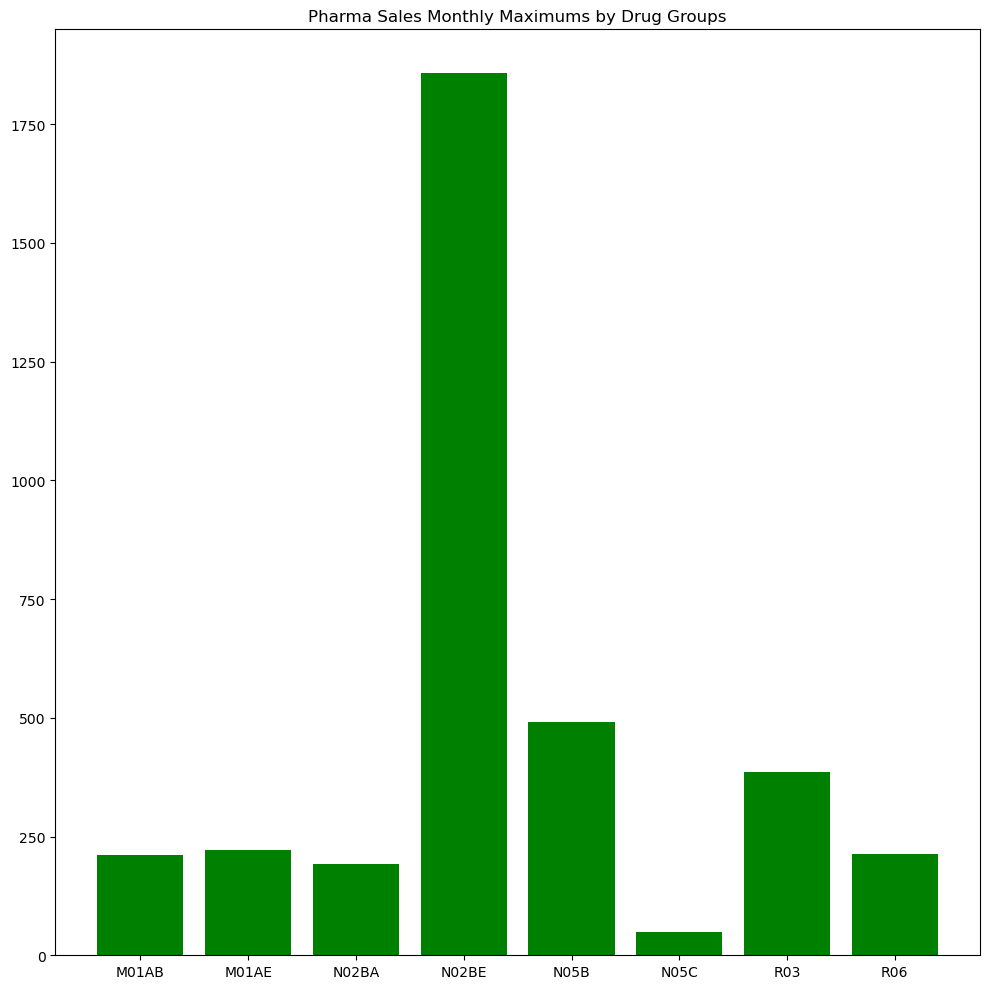

In [832]:
daily_max_arr = np.array([])
for x in cols:
        max_daily = np.max(data_daily[x])
        daily_max_arr = np.concatenate((daily_max_arr,[max_daily]))
        
        
weekly_max_arr = np.array([])
for x in cols:
        max_weekly = np.max(data_weekly[x])
        weekly_max_arr = np.concatenate((weekly_max_arr,[max_weekly]))
        
monthly_max_arr = np.array([])
for x in cols:
        max_monthly = np.max(data_monthly[x])
        monthly_max_arr = np.concatenate((monthly_max_arr,[max_monthly]))



bar_chart(daily_max_arr, 'red')
plt.title('Pharma Sales Daily Maximums by Drug Groups')
plt.show()
    

bar_chart(weekly_max_arr, 'blue')
plt.title('Pharma Sales Weekly Maximums by Drug Groups')
plt.show()
    
bar_chart(monthly_max_arr, 'green')
plt.title('Pharma Sales Monthly Maximums by Drug Groups')
plt.show()

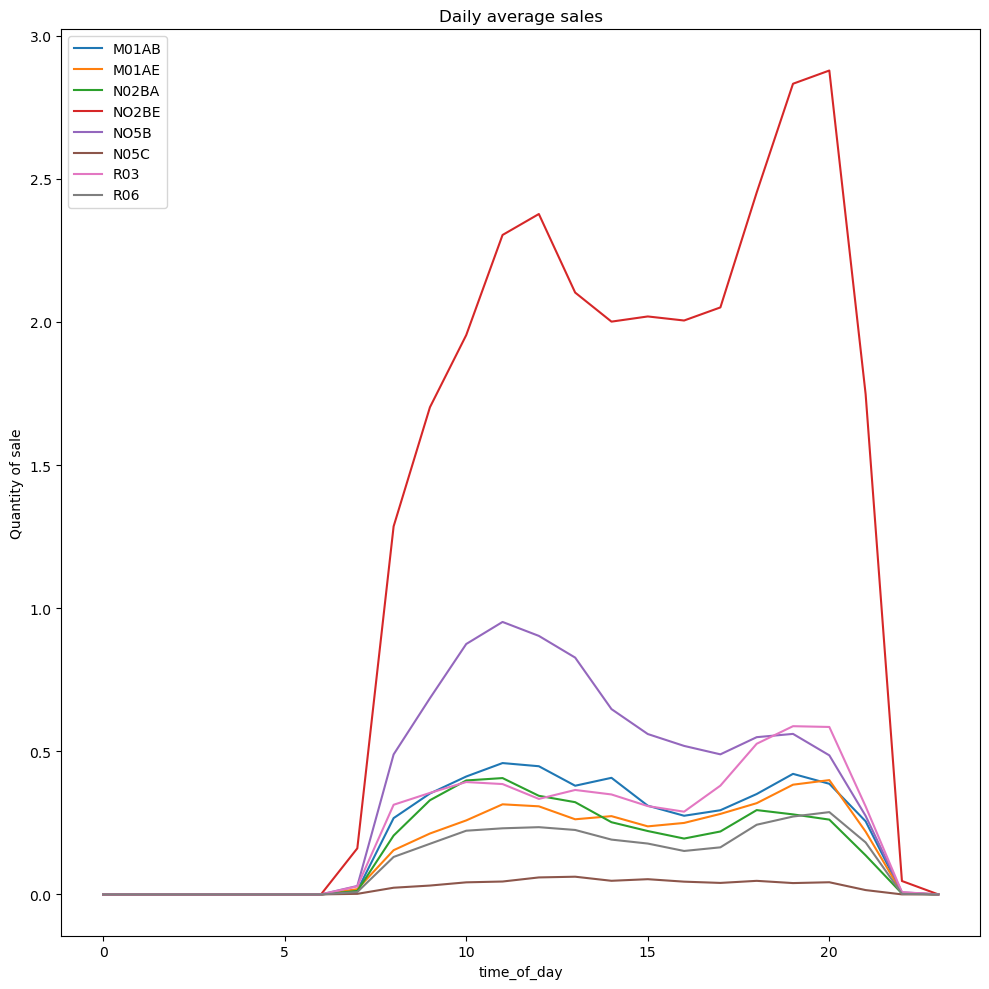

In [833]:
data_hourly['time_of_day']= pd.to_datetime(dfatch['datum']) 

M01AB=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['M01AB'].mean()
M01AE=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['M01AE'].mean()
N02BA=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['N02BA'].mean()

N02BE=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['N02BE'].mean()
N05B=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['N05B'].mean()

N05C=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['N05C'].mean()
R03=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['R03'].mean()
R06=data_hourly.groupby(data_hourly.time_of_day.dt.hour)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

M01AB.plot()
M01AE.plot()
N02BA.plot()
N02BE.plot()
N05B.plot()
N05C.plot()
R03.plot()
R06.plot()

plt.legend(['M01AB', 'M01AE', 'N02BA', 'NO2BE', 'NO5B', 'N05C', 'R03', 'R06',], loc='upper left')

plt.show()

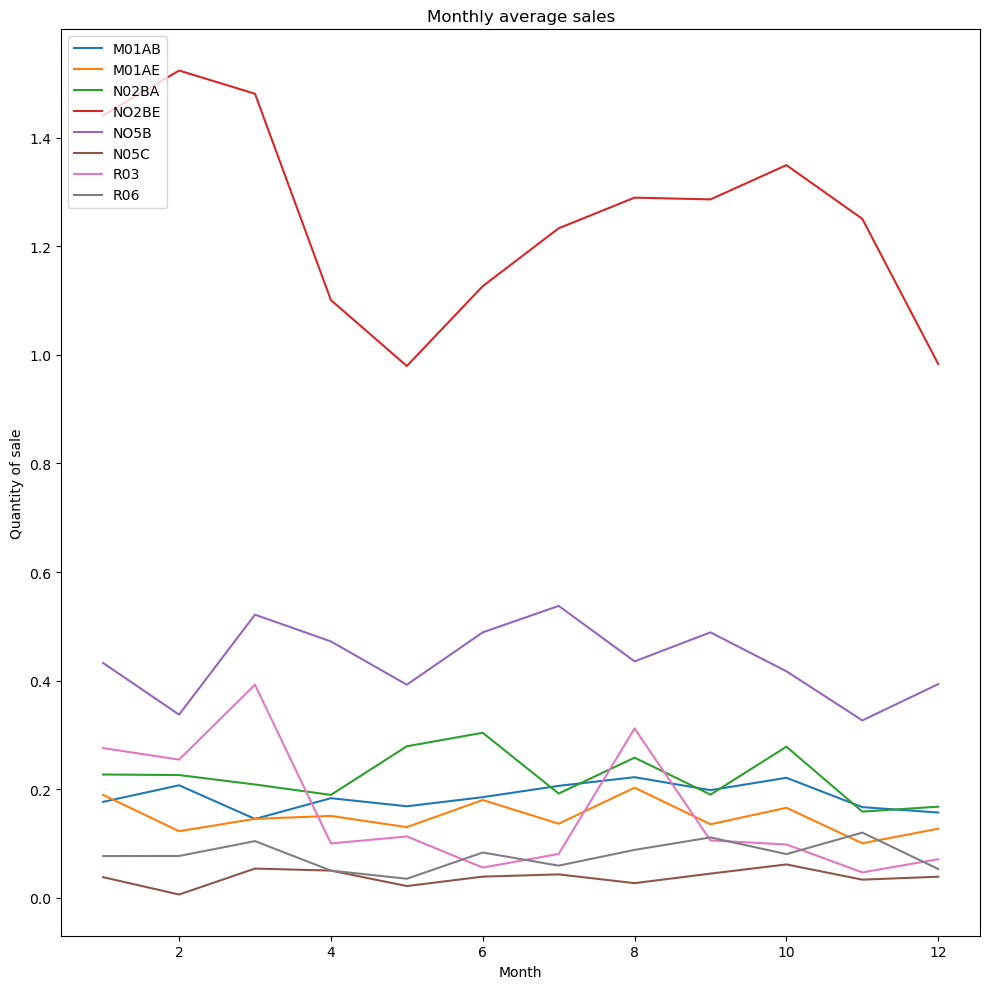

In [834]:
plt.title('Monthly average sales')
plt.xlabel('Month of Year')
plt.ylabel('Quantity of sale')



M01AB=data_hourly.groupby(data_daily.Month)['M01AB'].mean()
M01AE=data_hourly.groupby(data_daily.Month)['M01AE'].mean()
N02BA=data_hourly.groupby(data_daily.Month)['N02BA'].mean()
N02BE=data_hourly.groupby(data_daily.Month)['N02BE'].mean()
N05B=data_hourly.groupby(data_daily.Month)['N05B'].mean()
N05C=data_hourly.groupby(data_daily.Month)['N05C'].mean()
R03=data_hourly.groupby(data_daily.Month)['R03'].mean()
R06=data_hourly.groupby(data_daily.Month)['R06'].mean()

M01AB.plot()
M01AE.plot()
N02BA.plot()
N02BE.plot()
N05B.plot()
N05C.plot()
R03.plot()
R06.plot()

plt.legend(['M01AB', 'M01AE', 'N02BA', 'NO2BE', 'NO5B', 'N05C', 'R03', 'R06',], loc='upper left')

plt.show()

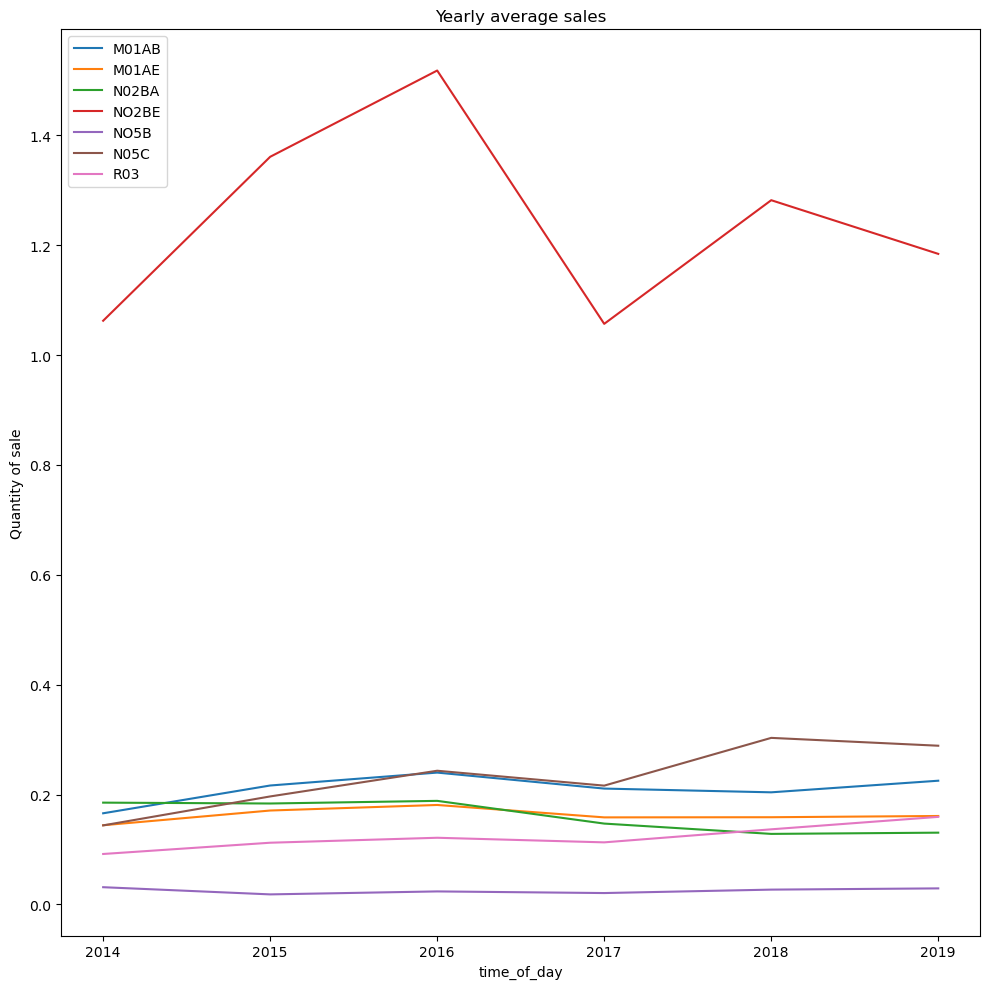

In [835]:
data_hourly['time_of_day']= pd.to_datetime(dfatch['datum']) 

M01AB=data_hourly.groupby(data_hourly.time_of_day.dt.year)['M01AB'].mean()
M01AE=data_hourly.groupby(data_hourly.time_of_day.dt.year)['M01AE'].mean()
N02BA=data_hourly.groupby(data_hourly.time_of_day.dt.year)['N02BA'].mean()
N02BE=data_hourly.groupby(data_hourly.time_of_day.dt.year)['N02BE'].mean()
N05C=data_hourly.groupby(data_hourly.time_of_day.dt.year)['N05C'].mean()
R03=data_hourly.groupby(data_hourly.time_of_day.dt.year)['R03'].mean()
R06=data_hourly.groupby(data_hourly.time_of_day.dt.year)['R06'].mean()

plt.title('Yearly average sales')
plt.xlabel('Year')
plt.ylabel('Quantity of sale')

M01AB.plot()
M01AE.plot()
N02BA.plot()
N02BE.plot()
N05C.plot()
R03.plot()
R06.plot()

plt.legend(['M01AB', 'M01AE', 'N02BA', 'NO2BE', 'NO5B', 'N05C', 'R03', 'R06',], loc='upper left')

plt.show()

In [836]:
data_daily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


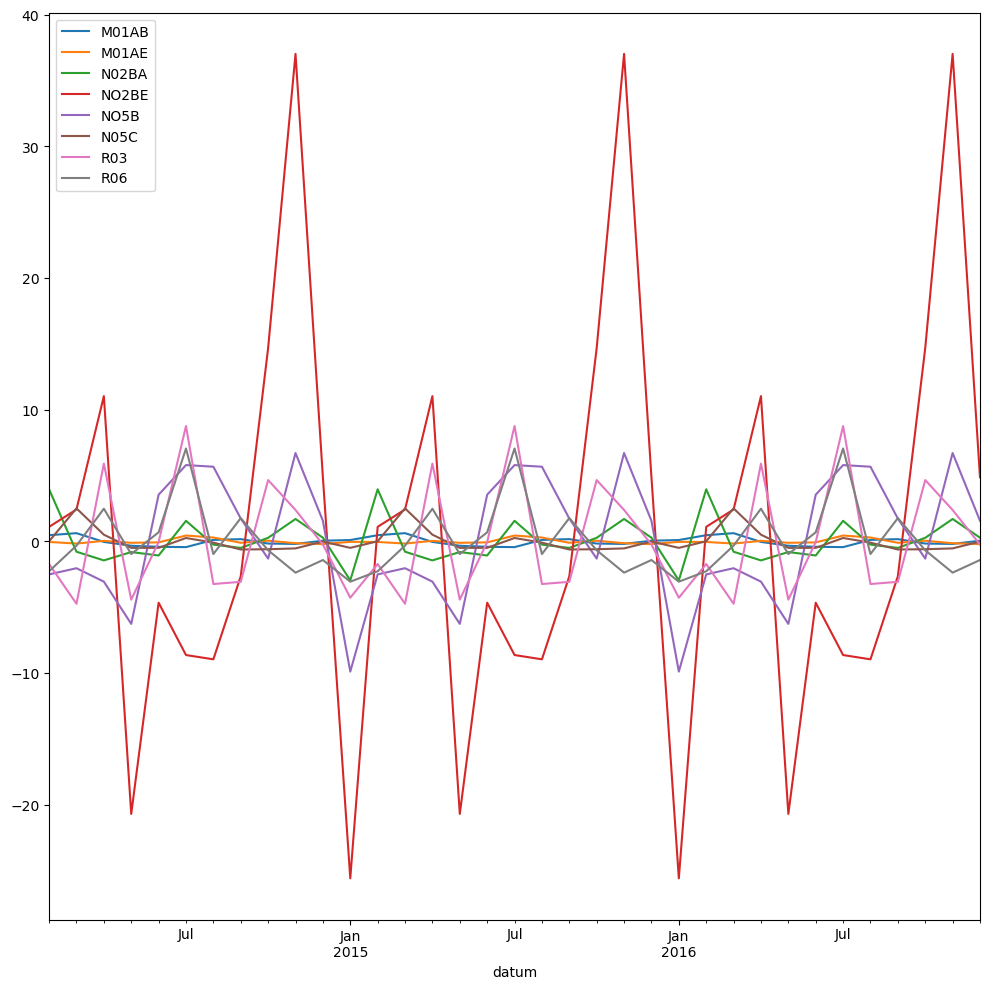

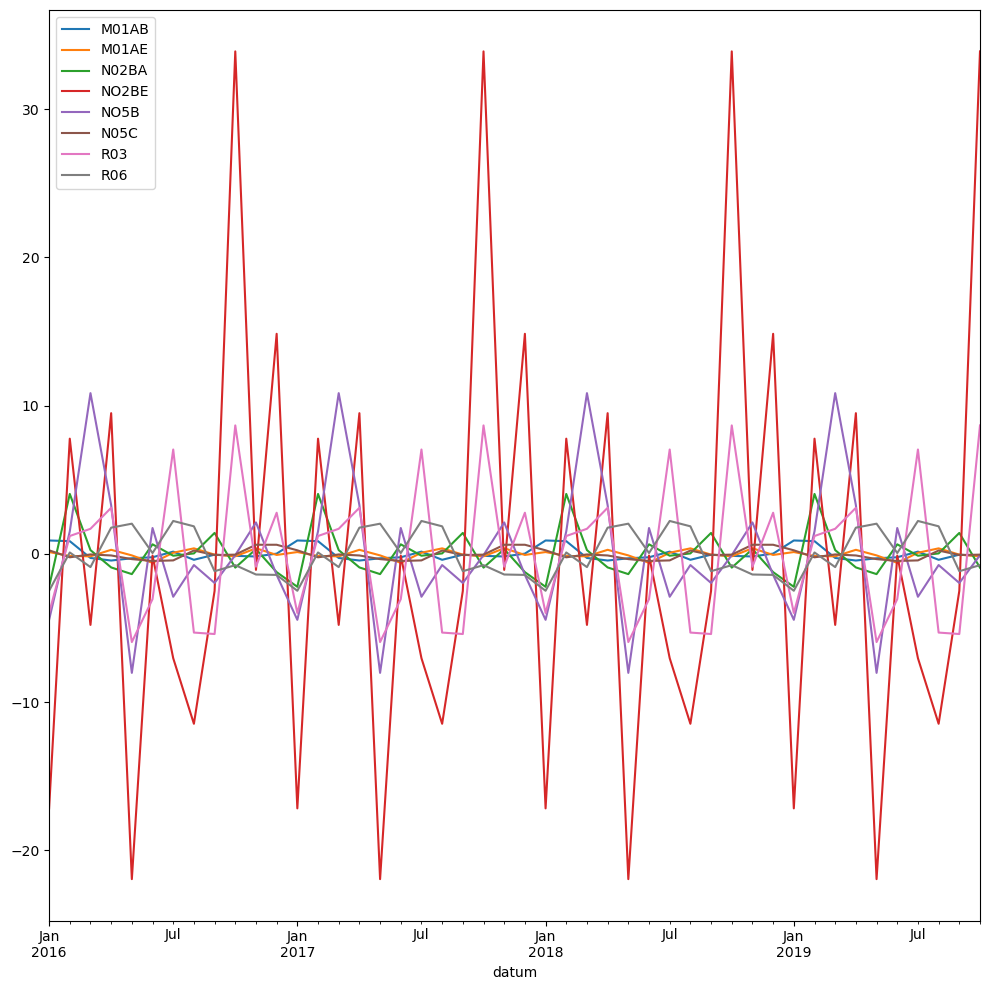

In [838]:
from statsmodels.tsa.seasonal import seasonal_decompose
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html


def show_seasonality_monthly(year_start, year_end):  
    data_daily = pd.read_csv('salesdaily.csv')
    


    data_daily['datum'] = pd.to_datetime(data_daily['datum'])
    data_daily['year'] = data_daily['datum'].dt.year
    data_daily['month'] = data_daily['datum'].dt.month
    data_daily['day'] = data_daily['datum'].dt.day



    data_daily = data_daily.set_index('datum').asfreq('D')
    data_daily.sort_values(by='datum', ascending=False)


    
    data_daily['M01AB_mean'] = data_daily.groupby(['year', 'month'])['M01AB'].transform('mean')
    data_daily['M01AE_mean'] = data_daily.groupby(['year', 'month'])['M01AE'].transform('mean')
    data_daily['N02BA_mean'] = data_daily.groupby(['year', 'month'])['N02BA'].transform('mean')
    data_daily['N02BE_mean'] = data_daily.groupby(['year', 'month'])['N02BE'].transform('mean')
    data_daily['N05B_mean'] = data_daily.groupby(['year', 'month'])['N05B'].transform('mean')
    data_daily['N05C_mean'] = data_daily.groupby(['year', 'month'])['N05C'].transform('mean')
    data_daily['R03_mean'] = data_daily.groupby(['year', 'month'])['R03'].transform('mean')
    data_daily['R06_mean'] = data_daily.groupby(['year', 'month'])['R06'].transform('mean')


    data_daily = data_daily[(data_daily.year <= year_end) ]
    data_daily = data_daily[(data_daily.year >= year_start) ]
    data_daily = data_daily[(data_daily.day == 1) ]
    # print(data_daily)
    
    M01AE = seasonal_decompose(data_daily['M01AE_mean'],  model='additive', filt=None)
    data_daily["M01AE_seasonality"]=np.array(M01AE.seasonal)
    M01AE.seasonal.plot()

    

    M01AB = seasonal_decompose(data_daily['M01AB_mean'],  model='additive', filt=None)
    data_daily["M01AB_seasonality"]=np.array(M01AB.seasonal)
    M01AB.seasonal.plot()


    N02BA = seasonal_decompose(data_daily['N02BA'],  model='additive', filt=None)
    data_daily["N02BA_seasonality"]=np.array(N02BA.seasonal)
    N02BA.seasonal.plot()
    


    N02BE = seasonal_decompose(data_daily['N02BE'],  model='additive', filt=None)
    data_daily["N02BE_seasonality"]=np.array(N02BE.seasonal)
    N02BE.seasonal.plot()


    
    N05B = seasonal_decompose(data_daily['N05B'],  model='additive', filt=None)
    data_daily["N05B_seasonality"]=np.array(N05B.seasonal)
    N05B.seasonal.plot()
    

    
    N05C = seasonal_decompose(data_daily['N05C'],  model='additive', filt=None)
    data_daily["N05C_seasonality"]=np.array(N05C.seasonal)
    N05C.seasonal.plot()
    

    R03 = seasonal_decompose(data_daily['R03'],  model='additive', filt=None)
    data_daily["R03_seasonality"]=np.array(R03.seasonal)
    R03.seasonal.plot()
    

    R06 = seasonal_decompose(data_daily['R06'],  model='additive', filt=None)
    data_daily["R06_seasonality"]=np.array(R06.seasonal)
    R06.seasonal.plot()
    


    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend(['M01AB', 'M01AE', 'N02BA', 'NO2BE', 'NO5B', 'N05C', 'R03', 'R06'], loc='upper left')

    plt.show()
    return data_daily

    



arr = show_seasonality_monthly(2014, 2016)


arr = show_seasonality_monthly(2016, 2019)



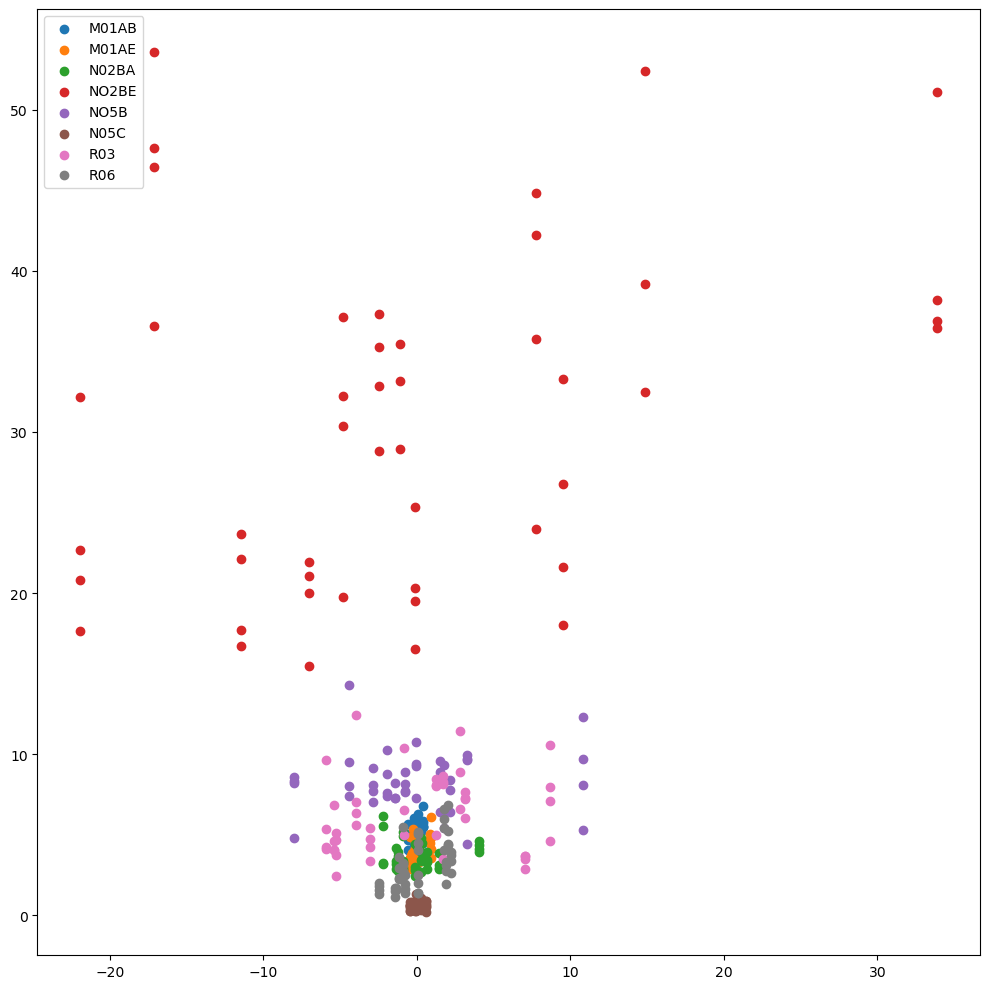

In [839]:
plt.scatter(arr['M01AB_seasonality'], arr['M01AB_mean'])
plt.scatter(arr['M01AE_seasonality'], arr['M01AE_mean'])
plt.scatter(arr['N02BA_seasonality'], arr['N02BA_mean'])
plt.scatter(arr['N02BE_seasonality'], arr['N02BE_mean'])
plt.scatter(arr['N05B_seasonality'], arr['N05B_mean'])
plt.scatter(arr['N05C_seasonality'], arr['N05C_mean'])
plt.scatter(arr['R03_seasonality'], arr['R03_mean'])
plt.scatter(arr['R06_seasonality'], arr['R06_mean'])


plt.legend(['M01AB', 'M01AE', 'N02BA', 'NO2BE', 'NO5B', 'N05C', 'R03', 'R06'], loc='upper left')

In [872]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



def create_linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression().fit(X_train, y_train)
    print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
    print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))
    return lr


Training set score: 0.05
Test set score: 0.06


LinearRegression()

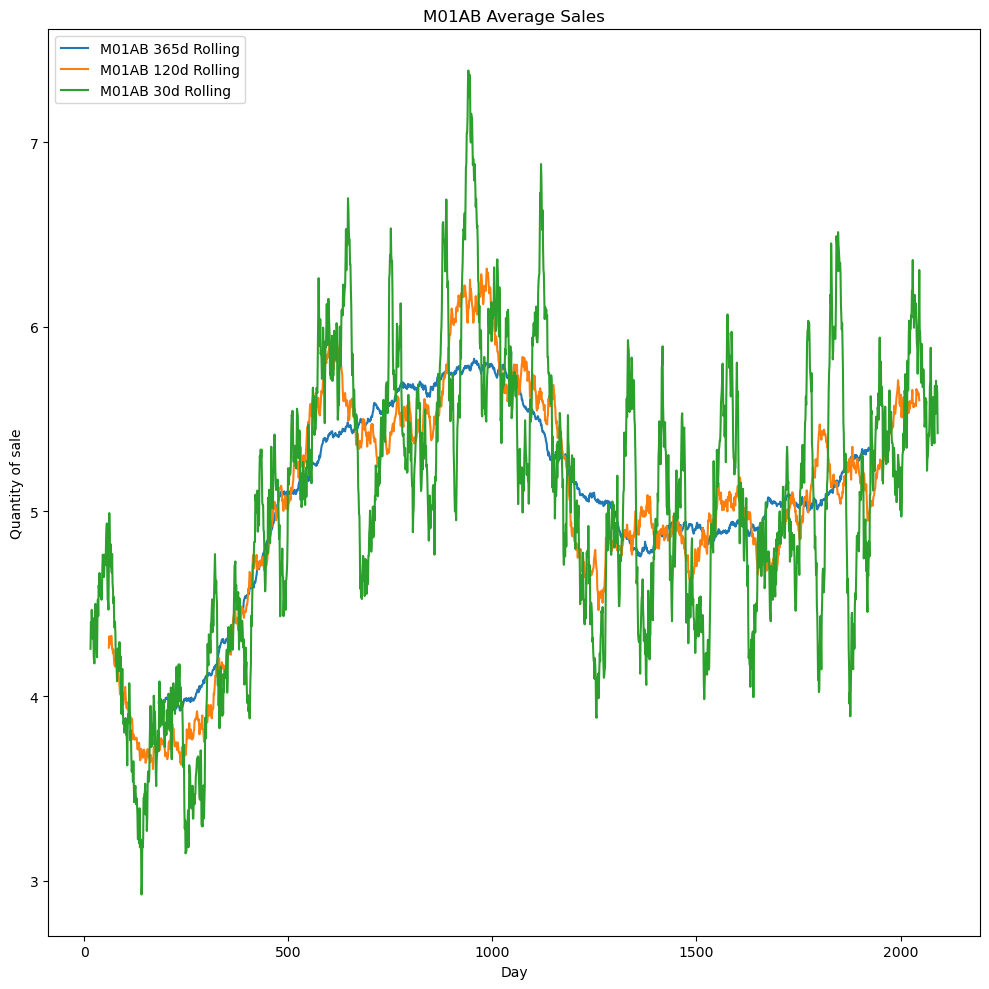

In [881]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


M01AB_365rolling = data_daily['M01AB'].rolling(window=365, center=True).mean()
M01AB_120rolling = data_daily['M01AB'].rolling(120, center=True).mean()
M01AB_30rolling = data_daily['M01AB'].rolling(30, center=True).mean()


plt.title('M01AB Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


M01AB_365rolling.plot()
M01AB_120rolling.plot()
M01AB_30rolling.plot()

plt.legend([ 'M01AB 365d Rolling', 'M01AB 120d Rolling', 'M01AB 30d Rolling'], loc='upper left')


# Apply Linear Regression for Forecasting
data_daily['M01AB_365rolling'] = M01AB_365rolling.values
data_daily.dropna(subset=['M01AB_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['M01AB_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)



Training set score: 0.01
Test set score: -0.00


LinearRegression()

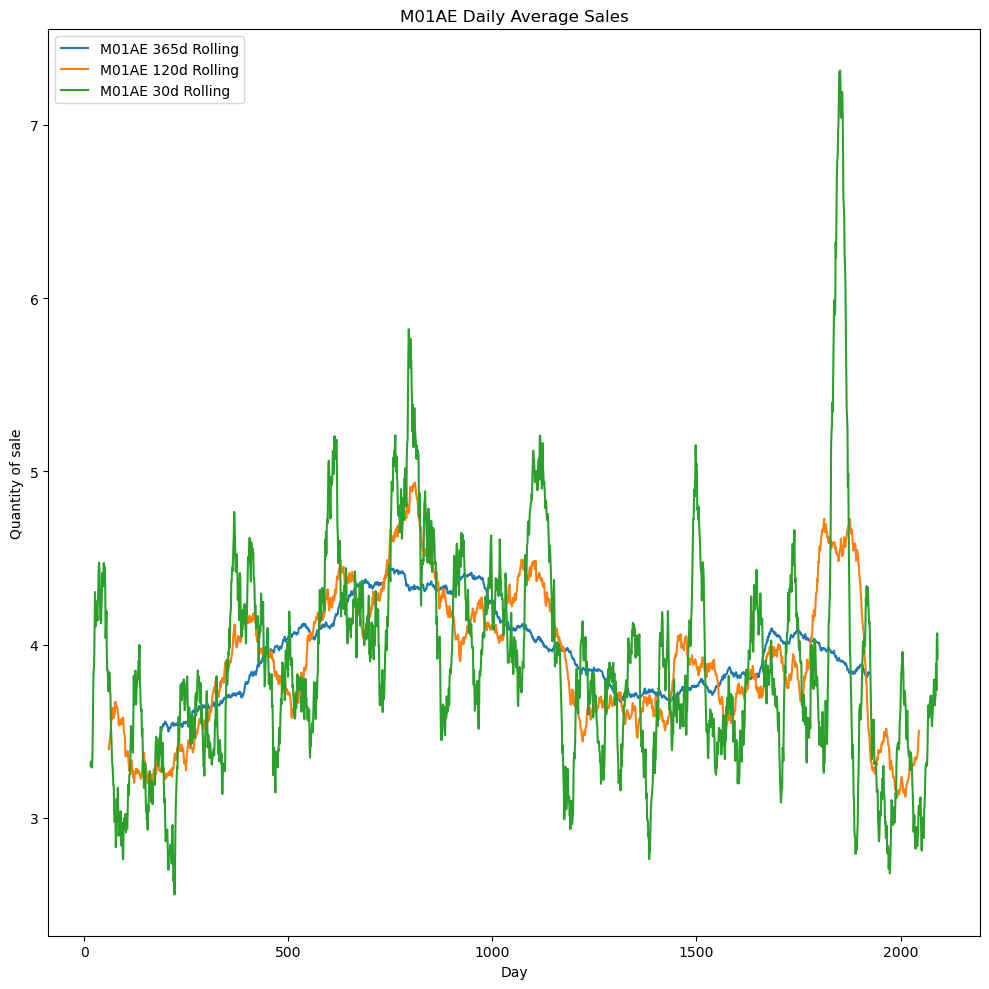

In [882]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


M01AE_365rolling = data_daily['M01AE'].rolling(window=365, center=True).mean()
M01AE_120rolling = data_daily['M01AE'].rolling(120, center=True).mean()
M01AE_30rolling = data_daily['M01AE'].rolling(30, center=True).mean()




plt.title('M01AE Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


M01AE_365rolling.plot()
M01AE_120rolling.plot()
M01AE_30rolling.plot()

plt.legend([ 'M01AE 365d Rolling', 'M01AE 120d Rolling', 'M01AE 30d Rolling'], loc='upper left')


# Apply Linear Regression for Forecasting
data_daily['M01AE_365rolling'] = M01AE_365rolling.values
data_daily.dropna(subset=['M01AE_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['M01AE_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)


Training set score: 0.76
Test set score: 0.76


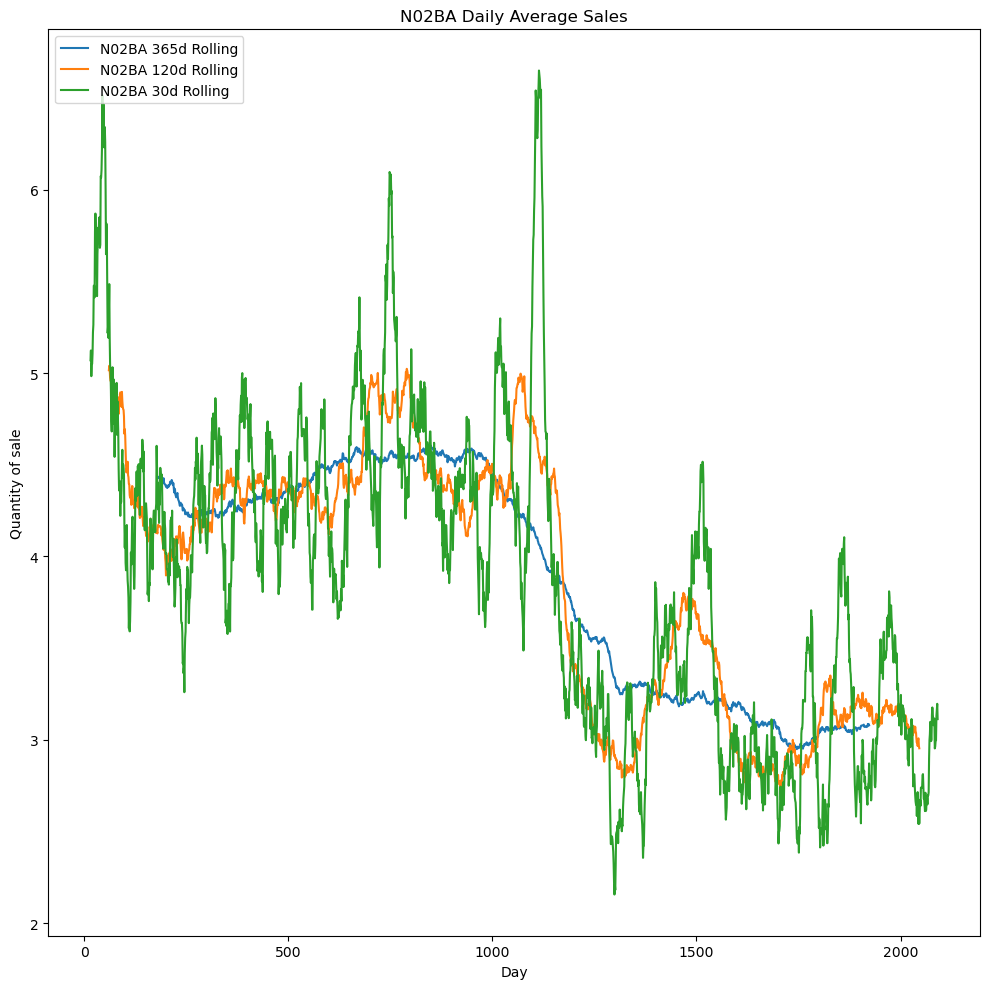

In [896]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


N02BA_365rolling = data_daily['N02BA'].rolling(window=365, center=True).mean()
N02BA_120rolling = data_daily['N02BA'].rolling(120, center=True).mean()
N02BA_30rolling = data_daily['N02BA'].rolling(30, center=True).mean()




N02BA_365rolling.plot()
N02BA_120rolling.plot()
N02BA_30rolling.plot()


plt.legend([ 'N02BA 365d Rolling', 'N02BA 120d Rolling', 'N02BA 30d Rolling', 'Prediction'], loc='upper left')



plt.title('N02BA Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')



# Apply Linear Regression for Forecasting
data_daily['N02BA_365rolling'] = N02BA_365rolling.values
data_daily.dropna(subset=['N02BA_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['N02BA_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_n02BA = create_linear_regression(X_train, X_test, y_train, y_test)




Training set score: 0.00
Test set score: -0.00


LinearRegression()

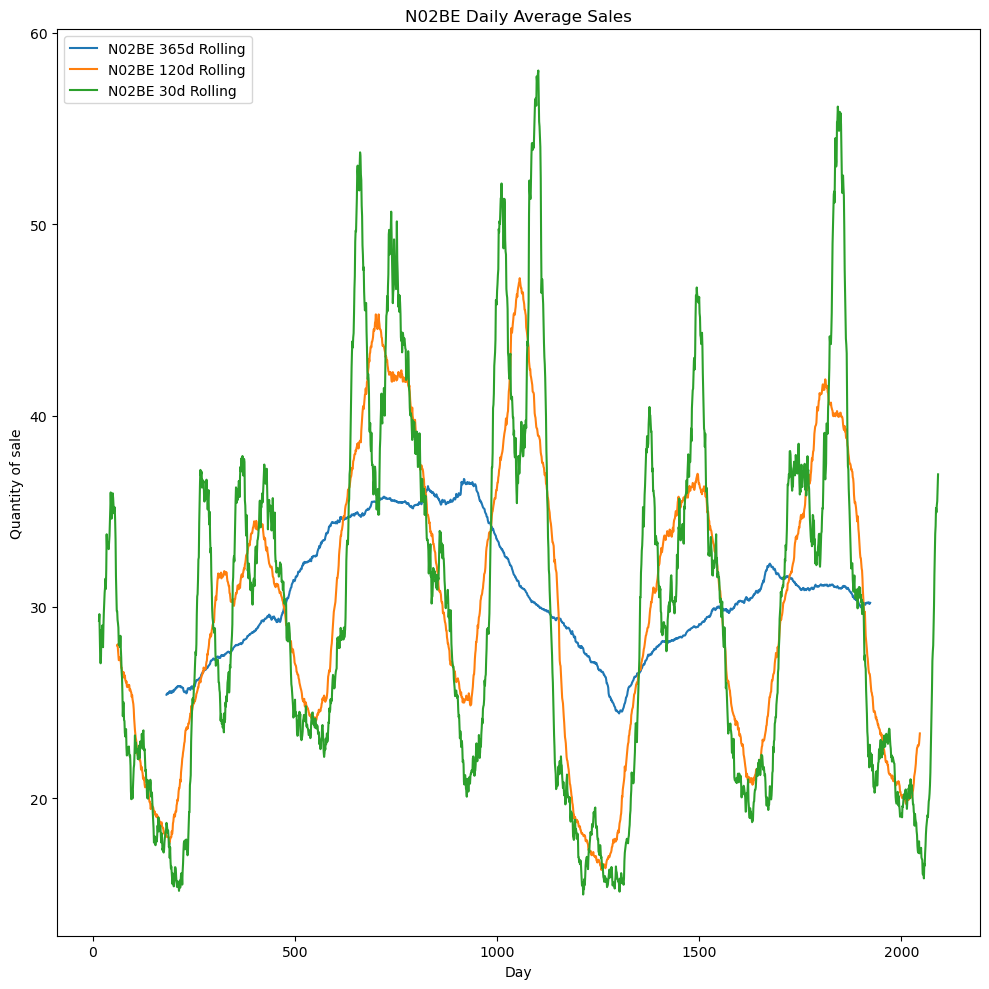

In [884]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1



N02BE_365rolling = data_daily['N02BE'].rolling(window=365, center=True).mean()
N02BE_120rolling = data_daily['N02BE'].rolling(120, center=True).mean()
N02BE_30rolling = data_daily['N02BE'].rolling(30, center=True).mean()




plt.title('N02BE Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


N02BE_365rolling.plot()
N02BE_120rolling.plot()
N02BE_30rolling.plot()

plt.legend([ 'N02BE 365d Rolling', 'N02BE 120d Rolling', 'N02BE 30d Rolling'], loc='upper left')



# Apply Linear Regression for Forecasting
data_daily['N02BE_365rolling'] = N02BE_365rolling.values
data_daily.dropna(subset=['N02BE_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['N02BE_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.23
Test set score: 0.28


LinearRegression()

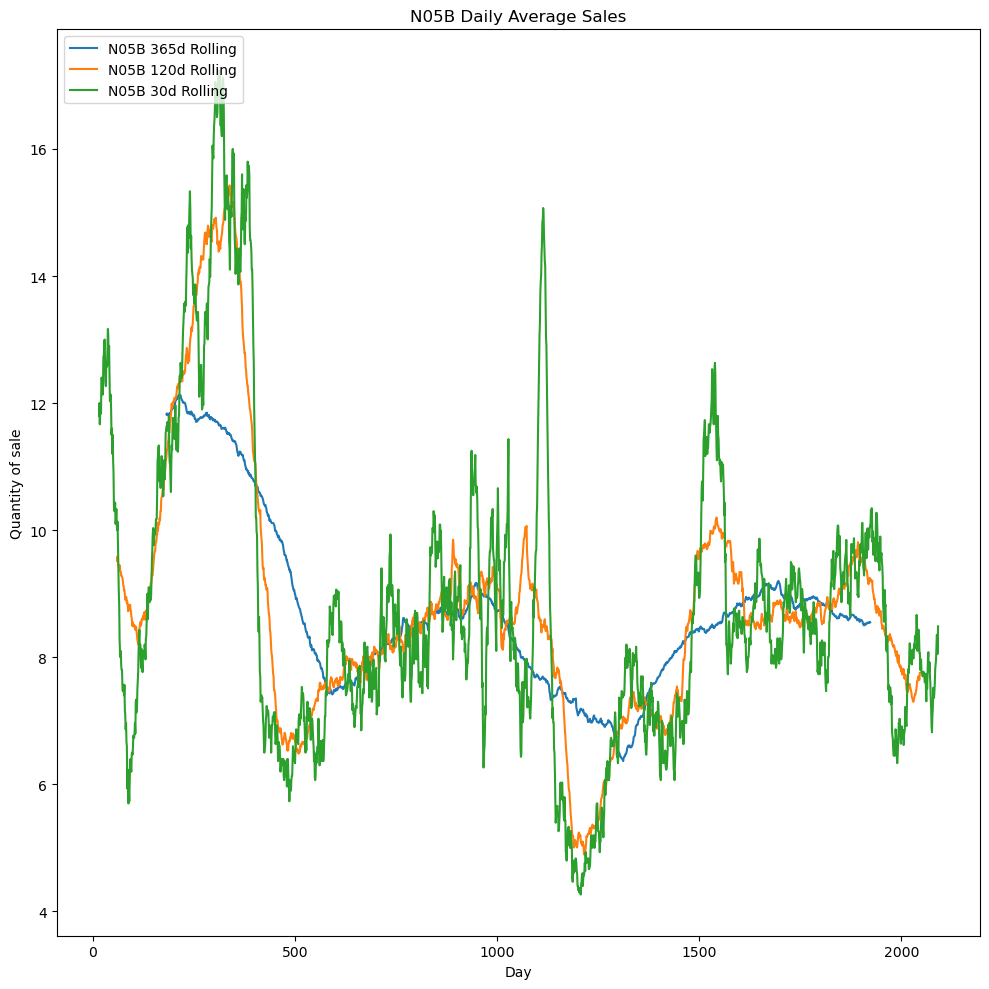

In [885]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1
N05B_365rolling = data_daily['N05B'].rolling(window=365, center=True).mean()
N05B_120rolling = data_daily['N05B'].rolling(120, center=True).mean()
N05B_30rolling = data_daily['N05B'].rolling(30, center=True).mean()




plt.title('N05B Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


N05B_365rolling.plot()
N05B_120rolling.plot()
N05B_30rolling.plot()

plt.legend([ 'N05B 365d Rolling', 'N05B 120d Rolling', 'N05B 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['N05B_365rolling'] = N05B_365rolling.values
data_daily.dropna(subset=['N05B_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['N05B_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.15
Test set score: 0.04


LinearRegression()

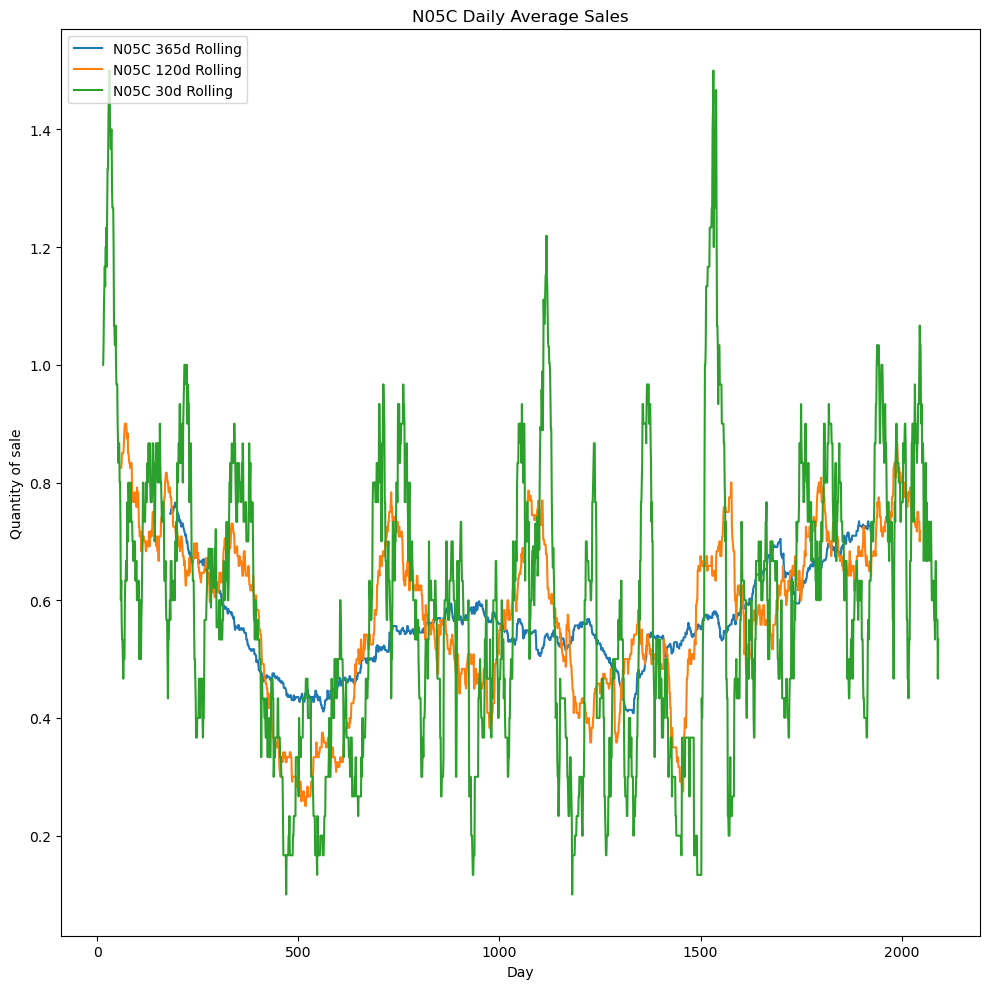

In [886]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1

N05C_365rolling = data_daily['N05C'].rolling(window=365, center=True).mean()
N05C_120rolling = data_daily['N05C'].rolling(120, center=True).mean()
N05C_30rolling = data_daily['N05C'].rolling(30, center=True).mean()




plt.title('N05C Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


N05C_365rolling.plot()
N05C_120rolling.plot()
N05C_30rolling.plot()

plt.legend([ 'N05C 365d Rolling', 'N05C 120d Rolling', 'N05C 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['N05C_365rolling'] = N05C_365rolling.values
data_daily.dropna(subset=['N05C_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['N05C_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.83
Test set score: 0.81


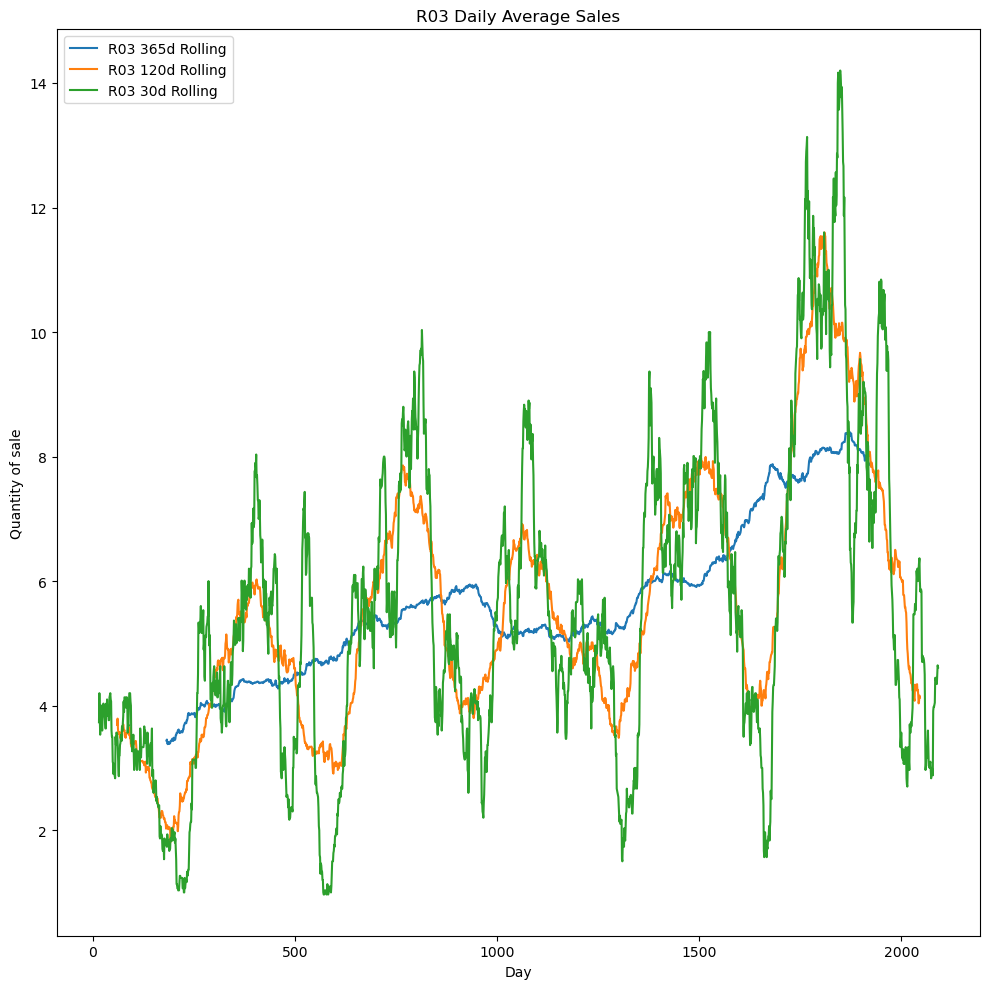

In [887]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1

R03_365rolling = data_daily['R03'].rolling(window=365, center=True).mean()
R03_120rolling = data_daily['R03'].rolling(120, center=True).mean()
R03_30rolling = data_daily['R03'].rolling(30, center=True).mean()




plt.title('R03 Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


R03_365rolling.plot()
R03_120rolling.plot()
R03_30rolling.plot()

plt.legend([ 'R03 365d Rolling', 'R03 120d Rolling', 'R03 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['R03_365rolling'] = R03_365rolling.values
data_daily.dropna(subset=['R03_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['R03_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r03 = create_linear_regression(X_train, X_test, y_train, y_test)

Training set score: 0.70
Test set score: 0.66


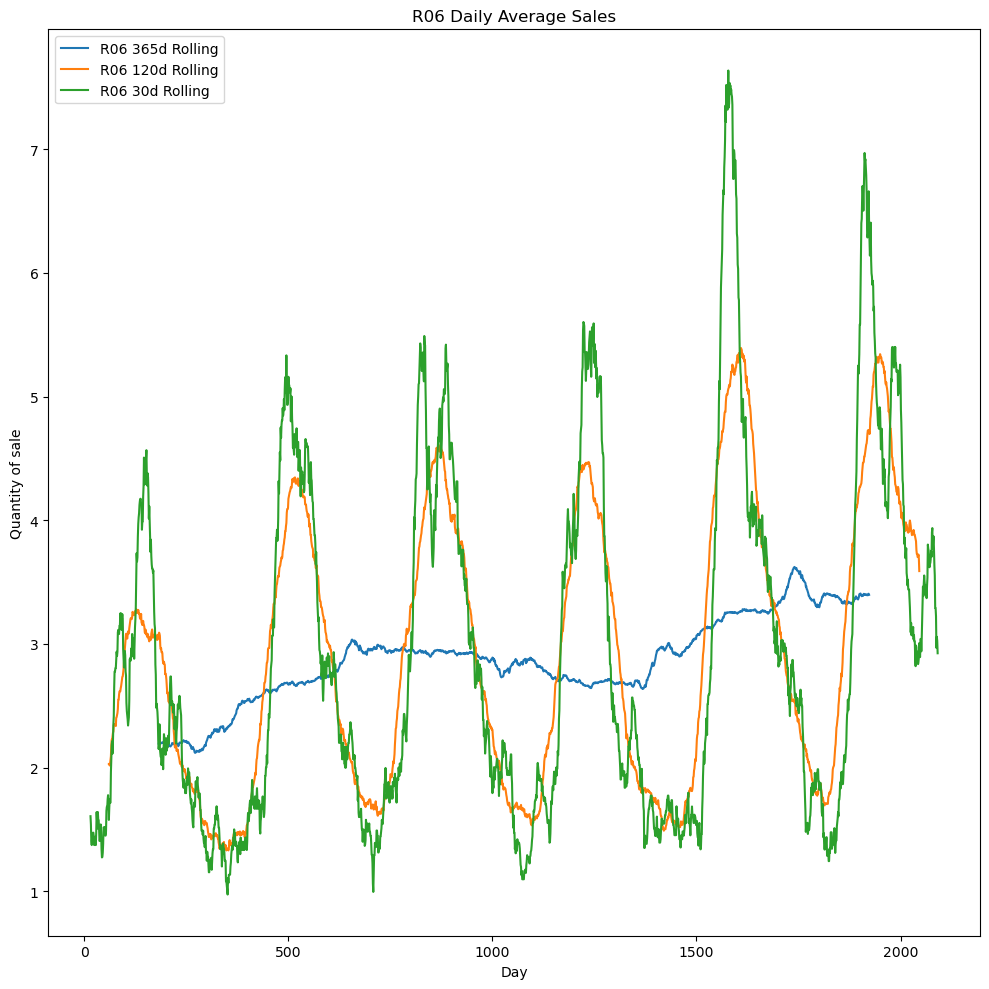

In [888]:
data_daily = pd.read_csv('salesdaily.csv')
data_daily['datum'] = pd.to_datetime(data_daily['datum'])
data_daily['datumNumber'] = 1
for index, row in df.iterrows():
    data_daily.loc[index, 'datumNumber'] = index+1


R06_365rolling = data_daily['R06'].rolling(window=365, center=True).mean()
R06_120rolling = data_daily['R06'].rolling(120, center=True).mean()
R06_30rolling = data_daily['R06'].rolling(30, center=True).mean()




plt.title('R06 Daily Average Sales')
plt.xlabel('Day')
plt.ylabel('Quantity of sale')


R06_365rolling.plot()
R06_120rolling.plot()
R06_30rolling.plot()

plt.legend([ 'R06 365d Rolling', 'R06 120d Rolling', 'R06 30d Rolling'], loc='upper left')

# Apply Linear Regression for Forecasting
data_daily['R06_365rolling'] = R06_365rolling.values
data_daily.dropna(subset=['R06_365rolling'], inplace=True)
X = data_daily['datumNumber'].values.reshape(-1, 1)
y = data_daily['R06_365rolling'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
lin_regression_r06 = create_linear_regression(X_train, X_test, y_train, y_test)